# Support Vector Machines

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
%matplotlib inline

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print(df.species.unique())
print(len(df.species.unique()))

['setosa' 'versicolor' 'virginica']
3


In [5]:
#premap species to number indexes
species_to_index={}
for i in range(len(df.species.unique())):
    species_to_index[df.species.unique()[i]]=i
    

In [6]:
df['species']=df['species'].map(species_to_index)

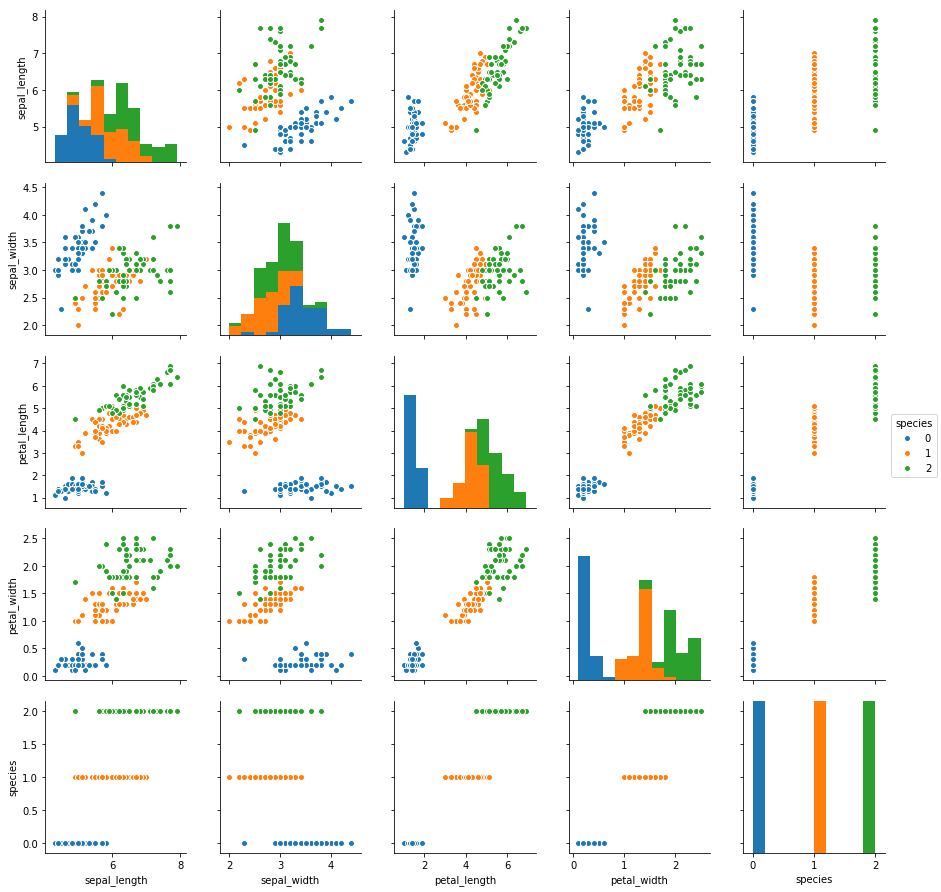

In [7]:
sns.pairplot(df,hue='species')

In [7]:
#predicting values based only on petal width and lenght
X,y=df.iloc[:,2:4],df['species']
svm_model = svm.SVC(kernel='linear',C=1)
svm_model.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
#setting everythin in one array
Xv=X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max()+1
y_min, y_max = y.min(), y.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                   np.arange(y_min,y_max,h))

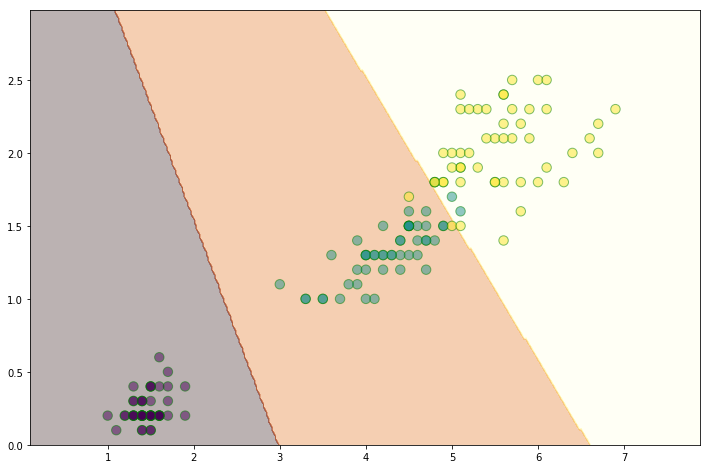

In [20]:
#vizualize decision boundaries
z = svm_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=89,alpha=0.5,edgecolors='g')

# Linear SMV with Standardized Features

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)

In [10]:
sc_x=StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [25]:
svm_model2 = svm.SVC(C=1.0,kernel='linear')
svm_model2.fit(X_std_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
res = cross_val_score(svm_model2, X_std_train, y_train, cv=10, scoring='accuracy')
print('Avg accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD \t {0:.4f}'.format(np.std(res)))

Avg accuracy: 	 0.9481
Accuracy SD 	 0.0591


In [29]:
y_train_pred = cross_val_predict(svm_model2,X_std_train,y_train,cv=3)

In [30]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  4, 40]])

In [34]:
print('Precision: {0:.4f}'.format(precision_score(y_train,y_train_pred,average='weighted')))
print('Recall: {0:.4f}'.format(recall_score(y_train,y_train,average='weighted')))
print('F1 score: {0:.4f}'.format(f1_score(y_train,y_train,average='weighted')))

Precision: 0.9509
Recall: 1.0000
F1 score: 1.0000


In [31]:
y_test_pred = cross_val_predict(svm_model2,sc_x.transform(X_test),y_test,cv=3)

In [32]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [33]:
print('Precision: {0:.4f}'.format(precision_score(y_test,y_test_pred,average='weighted')))
print('Recall: {0:.4f}'.format(recall_score(y_test,y_test_pred,average='weighted')))
print('F1 score: {0:.4f}'.format(f1_score(y_test,y_test_pred,average='weighted')))

Precision: 1.0000
Recall: 1.0000
F1 score: 1.0000


# Polynomial SVM

In [50]:
svm_model3 = svm.SVC(kernel='poly',degree=3,C=1.0)
svm_model3.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max()+1
y_min, y_max = y.min(), y.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                   np.arange(y_min,y_max,h))

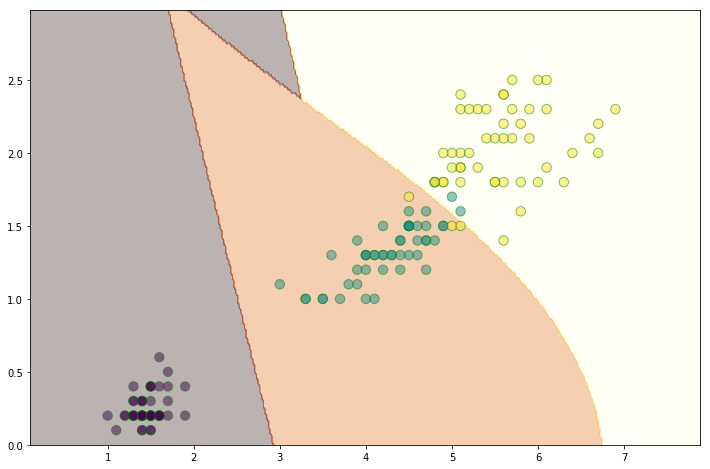

In [52]:
#vizualize decision boundaries
z = svm_model3.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=89,alpha=0.5,edgecolors='g')

In [54]:
svm_model4 = svm.SVC(kernel='poly',degree=3,C=1.0)
svm_model4.fit(X_std_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
res = cross_val_score(svm_model4, X_std_train, y_train, cv=10, scoring='accuracy')
print('Avg accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD \t {0:.4f}'.format(np.std(res)))

Avg accuracy: 	 0.9481
Accuracy SD 	 0.0591


In [56]:
y_train_pred = cross_val_predict(svm_model4,X_std_train,y_train,cv=3)

In [57]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  8, 36]])

In [58]:
print('Precision: {0:.4f}'.format(precision_score(y_train,y_train_pred,average='weighted')))
print('Recall: {0:.4f}'.format(recall_score(y_train,y_train,average='weighted')))
print('F1 score: {0:.4f}'.format(f1_score(y_train,y_train,average='weighted')))

Precision: 0.9452
Recall: 1.0000
F1 score: 1.0000


In [59]:
y_test_pred = cross_val_predict(svm_model4,sc_x.transform(X_test),y_test,cv=3)

In [60]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [61]:
print('Precision: {0:.4f}'.format(precision_score(y_test,y_test_pred,average='weighted')))
print('Recall: {0:.4f}'.format(recall_score(y_test,y_test_pred,average='weighted')))
print('F1 score: {0:.4f}'.format(f1_score(y_test,y_test_pred,average='weighted')))

Precision: 0.9690
Recall: 0.9667
F1 score: 0.9658


# Gaussian Radial Basis Function

In [11]:
svm_model5 = svm.SVC(kernel='rbf',C=1.0,gamma=0.7)
svm_model5.fit(X_std_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
res = cross_val_score(svm_model5, X_std_train, y_train, cv=10, scoring='accuracy')
print('Avg accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD \t {0:.4f}'.format(np.std(res)))

Avg accuracy: 	 0.9481
Accuracy SD 	 0.0591


In [13]:
y_train_pred = cross_val_predict(svm_model5,X_std_train,y_train,cv=3)

In [14]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  4, 40]])

In [15]:
print('Precision: {0:.4f}'.format(precision_score(y_train,y_train_pred,average='weighted')))
print('Recall: {0:.4f}'.format(recall_score(y_train,y_train,average='weighted')))
print('F1 score: {0:.4f}'.format(f1_score(y_train,y_train,average='weighted')))

Precision: 0.9509
Recall: 1.0000
F1 score: 1.0000


In [16]:
y_test_pred = cross_val_predict(svm_model5,sc_x.transform(X_test),y_test,cv=3)

In [17]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [18]:
print('Precision: {0:.4f}'.format(precision_score(y_test,y_test_pred,average='weighted')))
print('Recall: {0:.4f}'.format(recall_score(y_test,y_test_pred,average='weighted')))
print('F1 score: {0:.4f}'.format(f1_score(y_test,y_test_pred,average='weighted')))

Precision: 1.0000
Recall: 1.0000
F1 score: 1.0000


In [19]:
#Much better results than linear function

# Grid Search

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [24]:
pipeline = Pipeline([('svm_model',svm.SVC(kernel='rbf',C=1.0,gamma=0.1))])

In [29]:
params = {'svm_model__C':(0.1,0.5,1,2,5,10,20),'svm_model__gamma':(0.001,0.01,0.1,0.25,0.5,0.75,1)}

In [30]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=1,cv=3,verbose=1,scoring='accuracy')

In [31]:
svm_grid_rbf.fit(X_train,y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:    0.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('svm_model', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svm_model__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 'svm_model__C': (0.1, 0.5, 1, 2, 5, 10, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [33]:
svm_grid_rbf.best_score_

0.97499999999999998

In [36]:
best = svm_grid_rbf.best_estimator_.get_params()
for k in sorted(params.keys()):
    print('{0}: \t {1:.2f}'.format(k,best[k]))

	 svm_model__C: 	 0.10
	 svm_model__gamma: 	 0.50


In [37]:
#having found best params - perform validation in test dataset

In [38]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [39]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [40]:
print('Precision: {0:.4f}'.format(precision_score(y_test,y_test_pred,average='weighted')))
print('Recall: {0:.4f}'.format(recall_score(y_test,y_test_pred,average='weighted')))
print('F1 score: {0:.4f}'.format(f1_score(y_test,y_test_pred,average='weighted')))

Precision: 0.9714
Recall: 0.9667
F1 score: 0.9673


# SVM Regression